In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countries-of-the-world-2023/world-data-2023.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/kaggle/input/countries-of-the-world-2023/world-data-2023.csv')

In [5]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [6]:
data.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [7]:
data.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

In [8]:
import folium
map = folium.Map(location=[0, 0], zoom_start=3.3,tiles='stamentoner')

# Markers for each country
for index, row in data.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker([row['Latitude'], row['Longitude']], popup=row['Country']).add_to(map)
map

In [9]:
#Converting Object to float.(changing data type from string to numerical)
data['Density\n(P/Km2)'] = data['Density\n(P/Km2)'].str.replace(',', '').astype(float)
data['Agricultural Land( %)'] = data['Agricultural Land( %)'].str.replace('%', '').astype(float)
data['Land Area(Km2)'] = data['Land Area(Km2)'].str.replace(',', '').astype(float)
data['Co2-Emissions'] = data['Co2-Emissions'].str.replace(',', '').astype(float)
data['Urban_population'] = data['Urban_population'].str.replace(',', '').astype(float)
data['CPI Change (%)'] = data['CPI Change (%)'].str.replace('%', '').astype(float)
data['Forested Area (%)'] = data['Forested Area (%)'].str.replace('%', '').astype(float)
data['Gross primary education enrollment (%)'] = data['Gross primary education enrollment (%)'].str.replace('%', '').astype(float)
data['Gross tertiary education enrollment (%)'] = data['Gross tertiary education enrollment (%)'].str.replace('%', '').astype(float)
data['Population: Labor force participation (%)'] = data['Population: Labor force participation (%)'].str.replace('%', '').astype(float)
data['Tax revenue (%)'] = data['Tax revenue (%)'].str.replace('%', '').astype(float)
data['Armed Forces size'] = data['Armed Forces size'].str.replace(',', '').astype(float)
data['CPI'] = data['CPI'].str.replace(',', '').astype(float)
data['Gasoline Price'] = data['Gasoline Price'].str.replace('$', '').astype(float)
data['Unemployment rate'] = data['Unemployment rate'].str.replace('%', '').astype(float)
data['Total tax rate'] = data['Total tax rate'].str.replace('%', '').astype(float)
data['Population'] = data['Population'].str.replace(',', '').astype(float)
data['Minimum wage'] = data['Minimum wage'].str.replace('$', '').astype(float)
data['Out of pocket health expenditure'] = data['Out of pocket health expenditure'].str.replace('%', '').astype(float)
data['GDP'] = data['GDP'].str.replace('$', '')
data['GDP'] = data['GDP'].str.replace(',', '').astype(float)

/tmp/ipykernel_32/222115426.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Gasoline Price'] = data['Gasoline Price'].str.replace('$', '').astype(float)
/tmp/ipykernel_32/222115426.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Minimum wage'] = data['Minimum wage'].str.replace('$', '').astype(float)
/tmp/ipykernel_32/222115426.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['GDP'] = data['GDP'].str.replace('$', '')


In [10]:
data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [11]:
data.describe(include="O")

,Country,Abbreviation,Capital/Major City,Currency-Code,Largest city,Official language
count,195,188,192,180,189,194
unique,195,188,192,133,188,77
top,Afghanistan,AF,Kabul,EUR,S����,English
freq,1,1,1,23,2,31


In [12]:
# Checking the amount of null values in the data
data.isnull().sum()/len(data)*100

Country                                       0.000000
Density\n(P/Km2)                              0.000000
Abbreviation                                  3.589744
Agricultural Land( %)                         3.589744
Land Area(Km2)                                0.512821
Armed Forces size                            12.307692
Birth Rate                                    3.076923
Calling Code                                  0.512821
Capital/Major City                            1.538462
Co2-Emissions                                 3.589744
CPI                                           8.717949
CPI Change (%)                                8.205128
Currency-Code                                 7.692308
Fertility Rate                                3.589744
Forested Area (%)                             3.589744
Gasoline Price                               10.256410
GDP                                           1.025641
Gross primary education enrollment (%)        3.589744
Gross tert

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1954910012.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

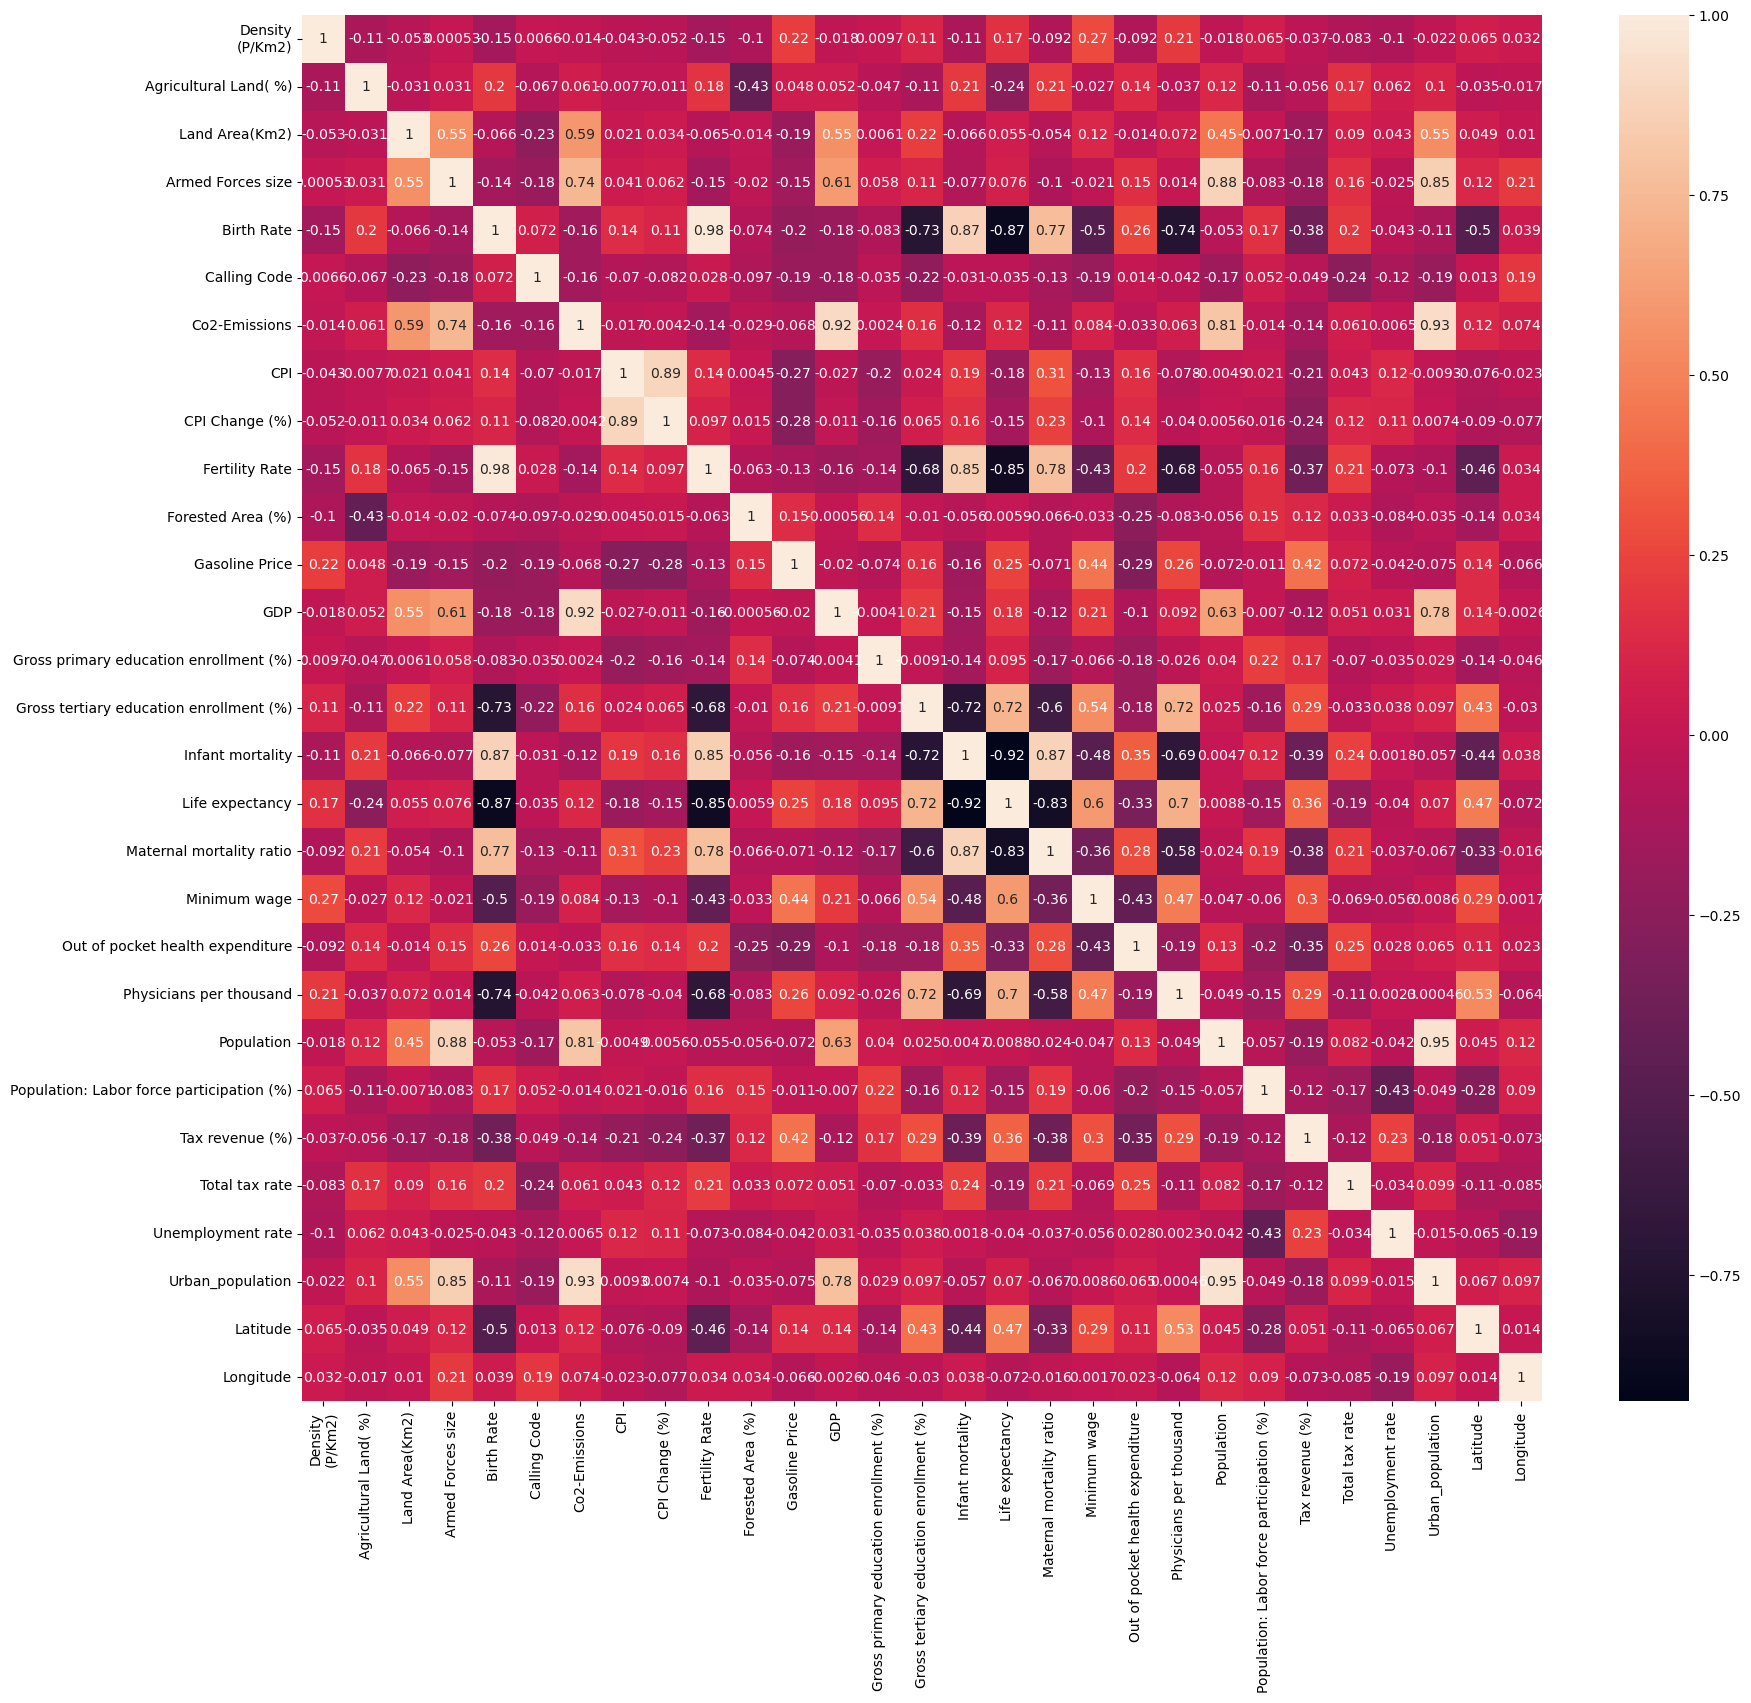

In [13]:
import seaborn as sns
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot = True)


**Analyze population density and land area to study spatial distribution patterns.**

/tmp/ipykernel_32/1385932059.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Agricultural Land( %)'])


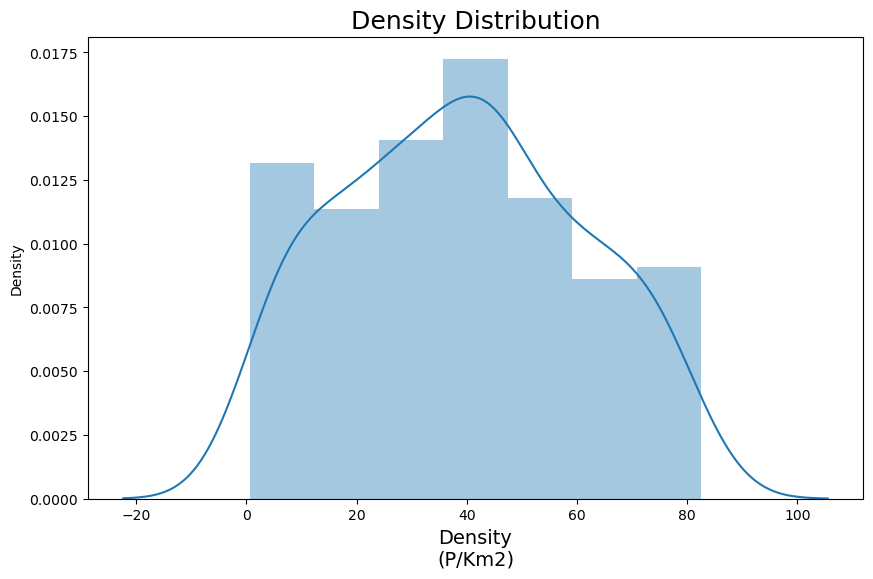

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(data['Agricultural Land( %)'])
plt.title('Density Distribution',size=18)
plt.xlabel('Density\n(P/Km2)',size=14)
plt.show()

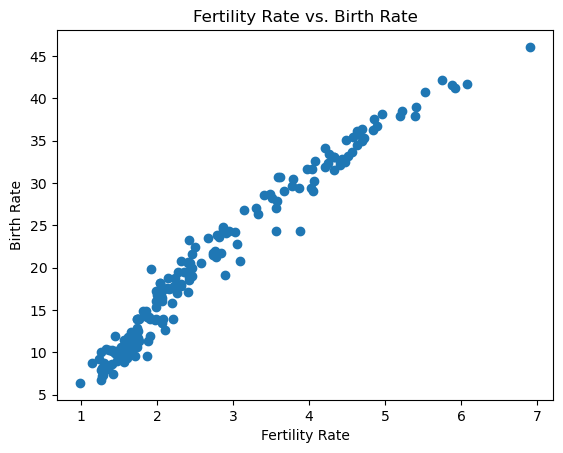

In [15]:
plt.scatter(data['Fertility Rate'], data['Birth Rate'])
plt.xlabel('Fertility Rate')
plt.ylabel('Birth Rate')
plt.title('Fertility Rate vs. Birth Rate')
plt.show()

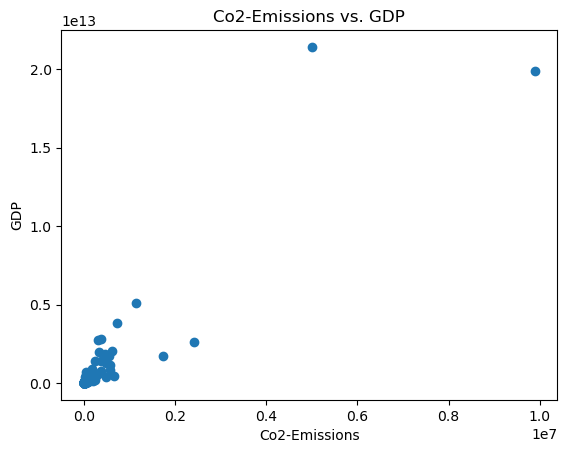

In [16]:
plt.scatter(data['Co2-Emissions'], data['GDP'])
plt.xlabel('Co2-Emissions')
plt.ylabel('GDP')
plt.title('Co2-Emissions vs. GDP')
plt.show()

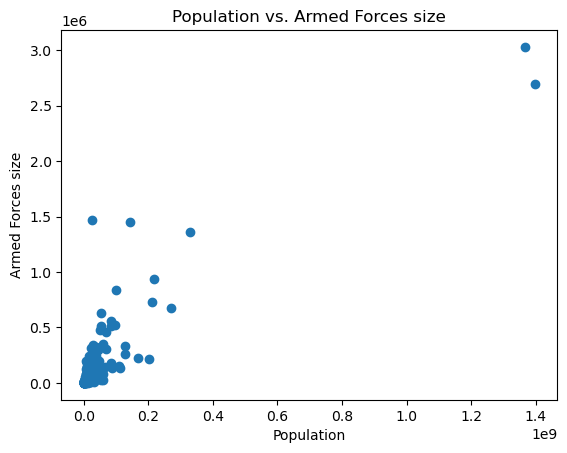

In [45]:
plt.scatter(data['Population'], data['Armed Forces size'])
plt.xlabel('Population')
plt.ylabel('Armed Forces size')
plt.title('Population vs. Armed Forces size')
plt.show()

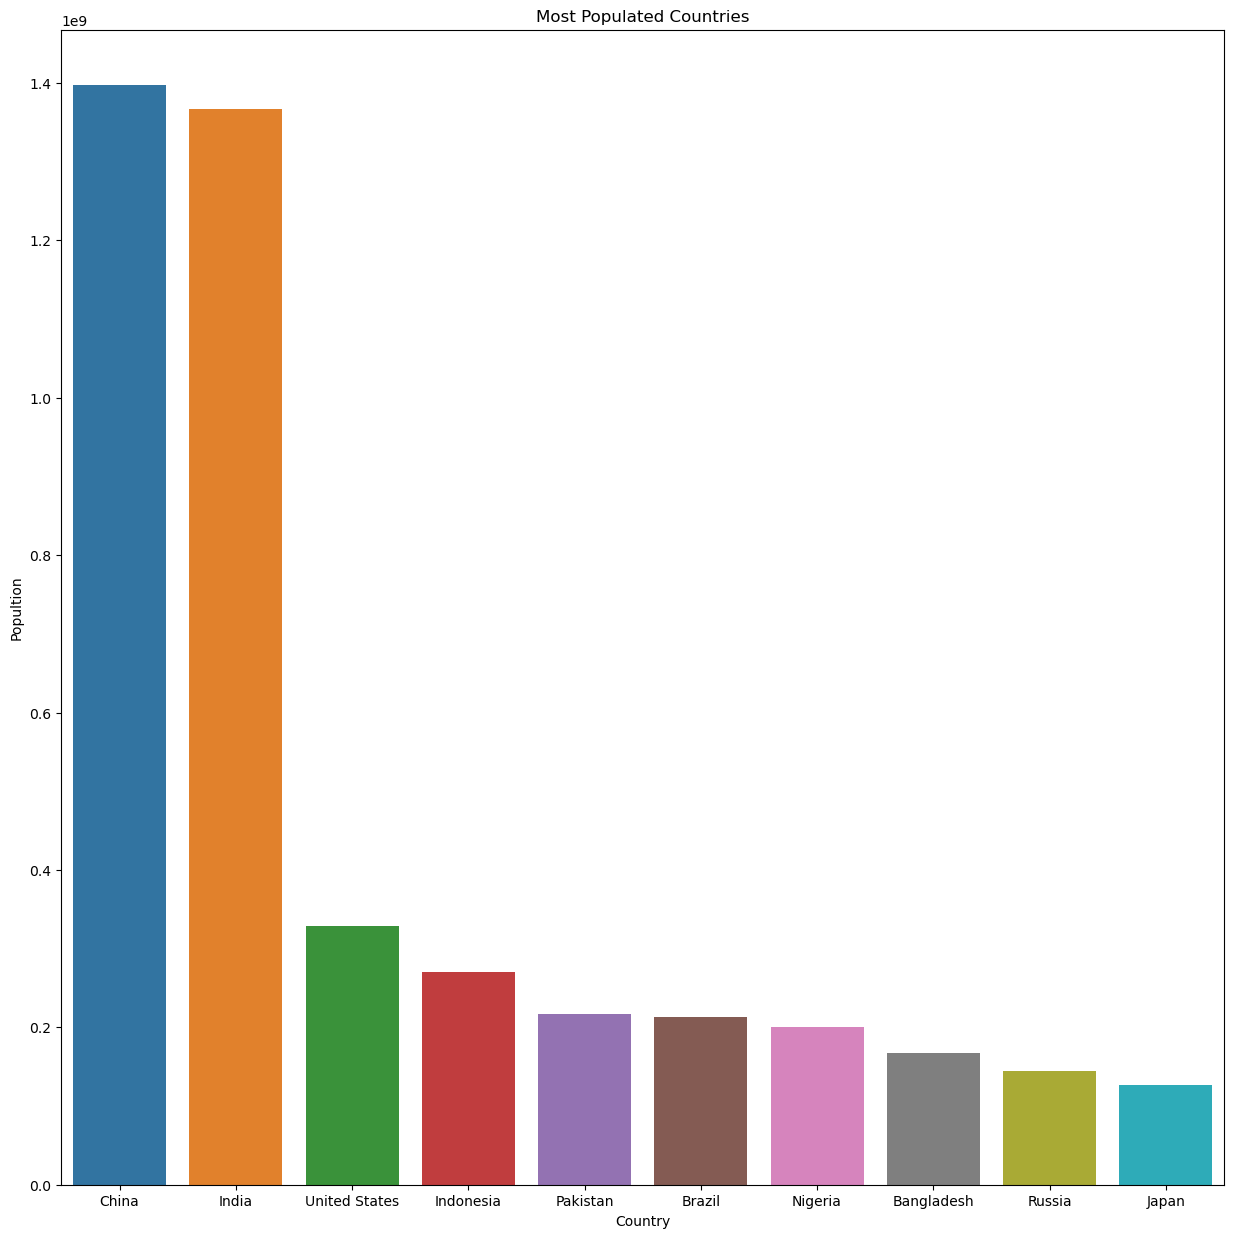

In [58]:
top_countries = data.copy()
top_countries = top_countries.sort_values("Population",ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x=top_countries["Country"][:10], y=top_countries["Population"])
plt.title("Most Populated Countries")
plt.xlabel("Country")
plt.ylabel("Popultion")
plt.show()

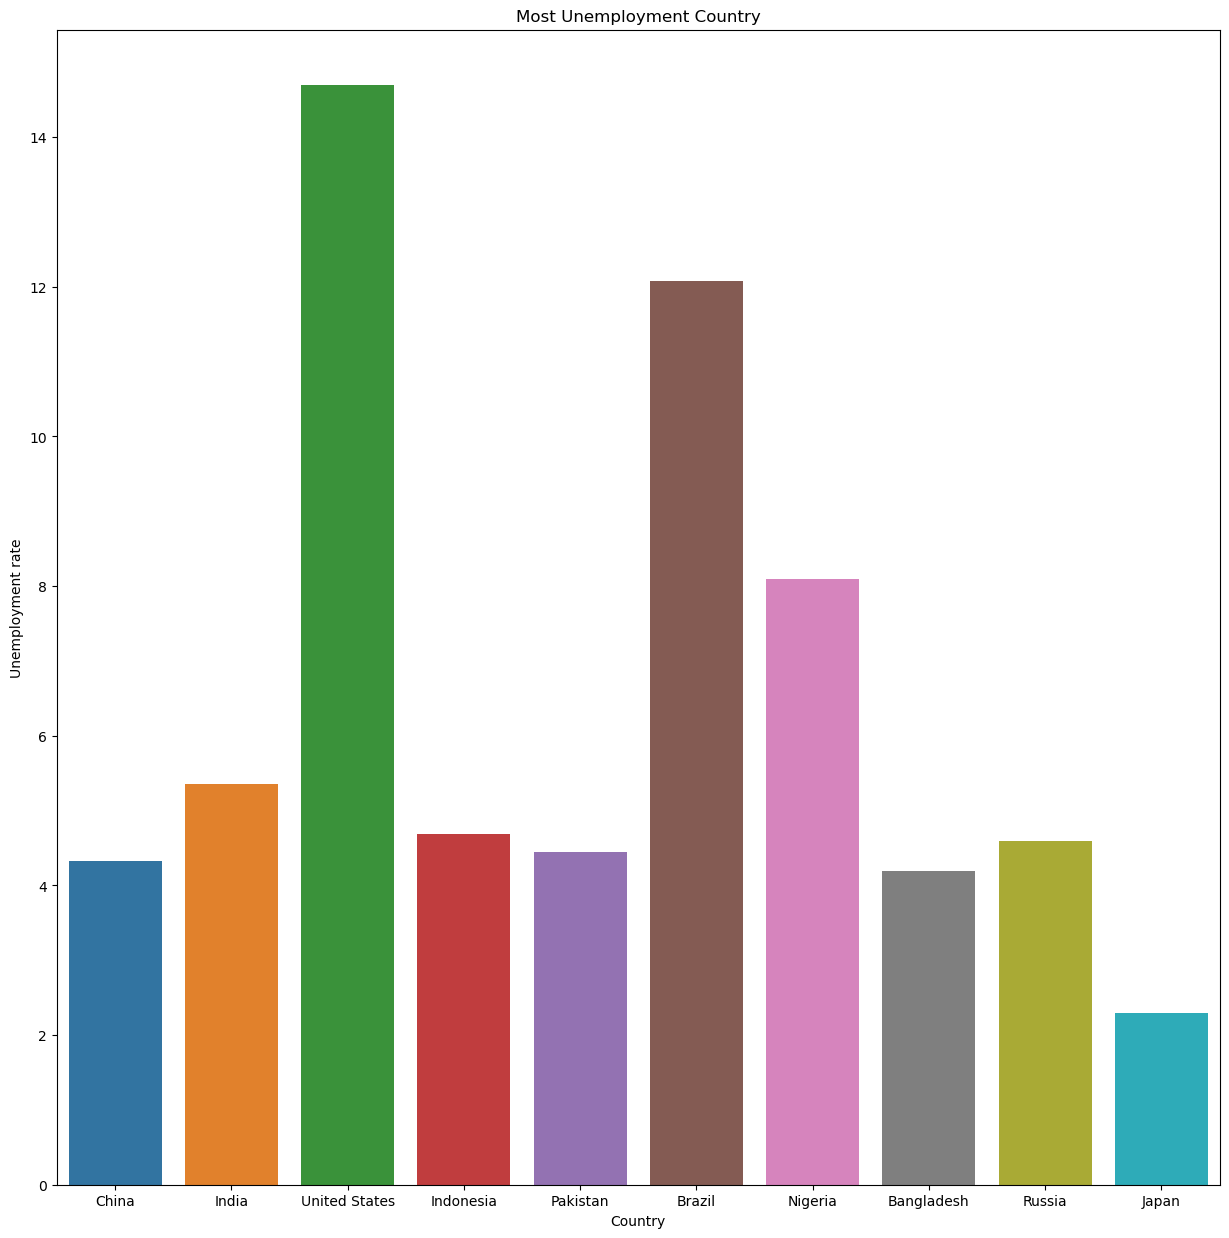

In [79]:
top_countries_Unemplyment_rate = data.copy()
top_countries_Unemplyment_rate = top_countries.sort_values("Unemployment rate",ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x=top_countries["Country"][:10], y=top_countries["Unemployment rate"])
plt.title("Most Unemployment Country")
plt.xlabel("Country")
plt.ylabel("Unemployment rate")
plt.show()

**Analyze population density and land area to study spatial distribution patterns.**

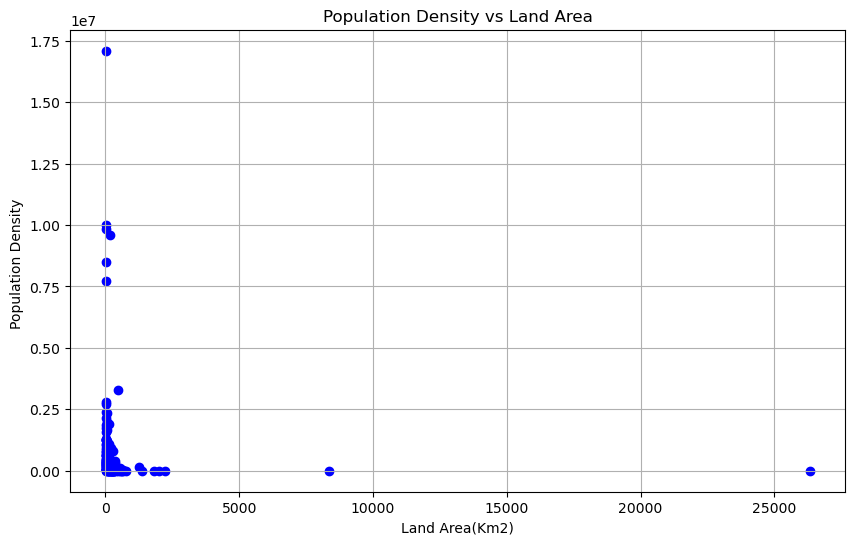

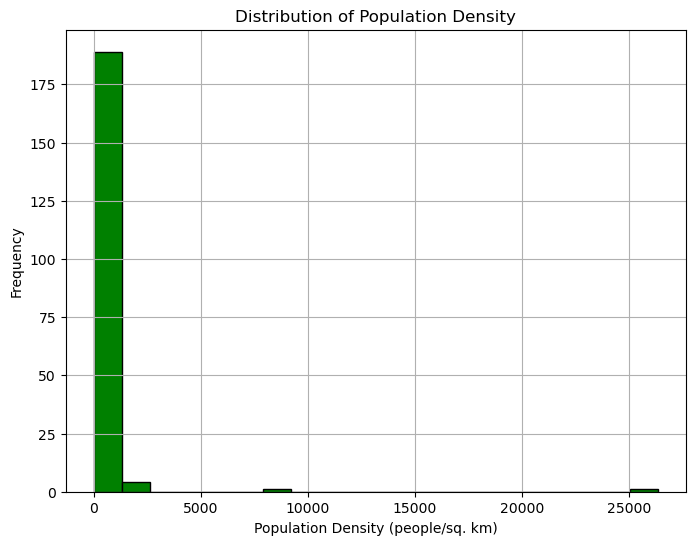

In [85]:

# Scatter plot to visualize the relationship between Population Density and Land Area
plt.figure(figsize=(10, 6))
plt.scatter(data["Density\n(P/Km2)"], data["Land Area(Km2)"], color="blue")
plt.xlabel("Land Area(Km2)")
plt.ylabel("Population Density ")
plt.title("Population Density vs Land Area")
plt.grid(True)
plt.show()

# Histogram to visualize the distribution of Population Density
plt.figure(figsize=(8, 6))
plt.hist(data["Density\n(P/Km2)"], bins=20, color="green", edgecolor="black")
plt.xlabel("Population Density (people/sq. km)")
plt.ylabel("Frequency")
plt.title("Distribution of Population Density")
plt.grid(True)
plt.show()



**Investigate the relationship between agricultural land and food security.**

In [99]:
food_security_indicators=data.copy()
food_security_indicators = ["GDP","Unemployment rate","Infant mortality"]

correlation_df = data[["Agricultural Land( %)"] + food_security_indicators]
correlation_matrix = correlation_df.corr()

print(correlation_matrix)


                       Agricultural Land( %)       GDP  Unemployment rate  \
Agricultural Land( %)               1.000000  0.051840           0.062049   
GDP                                 0.051840  1.000000           0.031221   
Unemployment rate                   0.062049  0.031221           1.000000   
Infant mortality                    0.207010 -0.152934           0.001766   

                       Infant mortality  
Agricultural Land( %)          0.207010  
GDP                           -0.152934  
Unemployment rate              0.001766  
Infant mortality               1.000000  


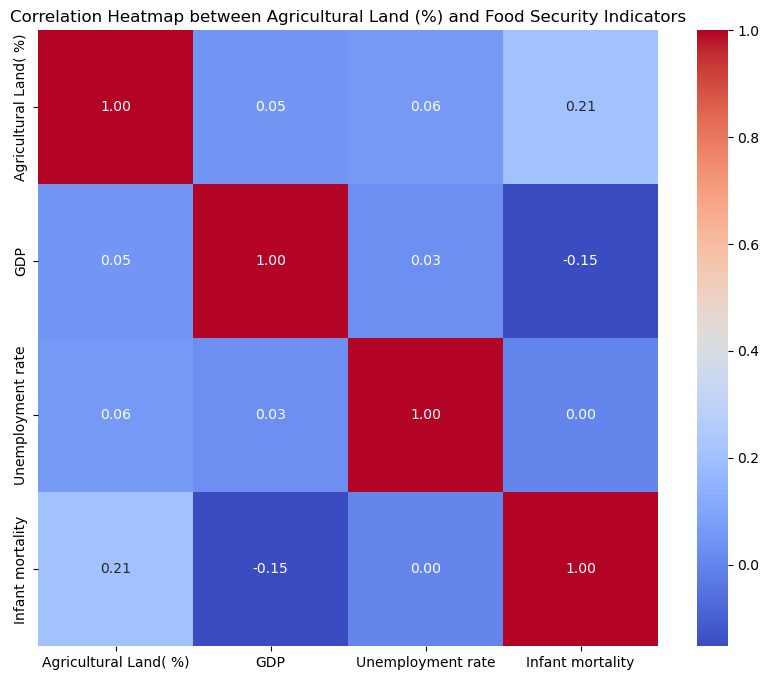

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Agricultural Land (%) and Food Security Indicators")
plt.show()


**Examine carbon dioxide emissions and their impact on climate change.**

                   Co2-Emissions  Density\n(P/Km2)  Land Area(Km2)  \
Co2-Emissions           1.000000         -0.014262        0.590746   
Density\n(P/Km2)       -0.014262          1.000000       -0.053279   
Land Area(Km2)          0.590746         -0.053279        1.000000   
Forested Area (%)      -0.028803         -0.100466       -0.014278   
Urban_population        0.926263         -0.022420        0.546836   

                   Forested Area (%)  Urban_population  
Co2-Emissions              -0.028803          0.926263  
Density\n(P/Km2)           -0.100466         -0.022420  
Land Area(Km2)             -0.014278          0.546836  
Forested Area (%)           1.000000         -0.034797  
Urban_population           -0.034797          1.000000  


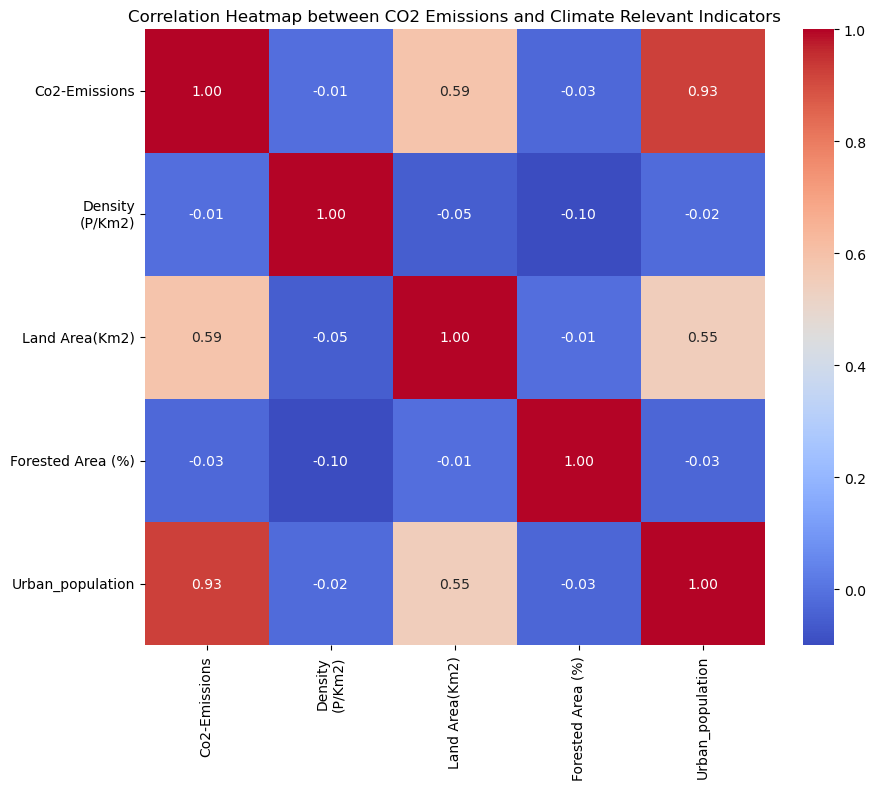

In [107]:
climate_relevant_indicators=data.copy()
climate_relevant_indicators = [
    "Density\n(P/Km2)",
    "Land Area(Km2)",
    "Forested Area (%)",
    "Urban_population"]

correlation_df = data[["Co2-Emissions"] + climate_relevant_indicators]
correlation_matrix = correlation_df.corr()

print(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between CO2 Emissions and Climate Relevant Indicators")
plt.show()

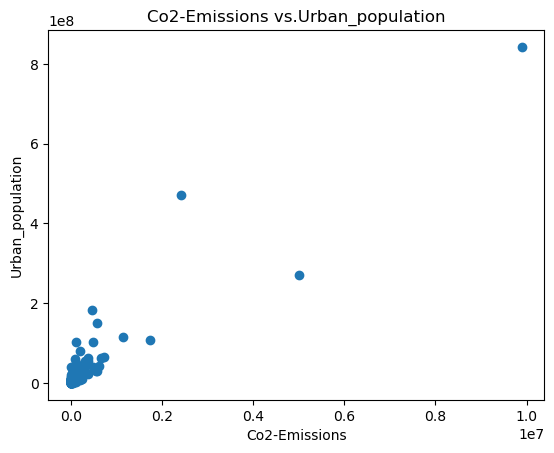

In [112]:
plt.scatter(data['Co2-Emissions'], data['Urban_population'])
plt.xlabel('Co2-Emissions')
plt.ylabel('Urban_population')
plt.title('Co2-Emissions vs.Urban_population')
plt.show()



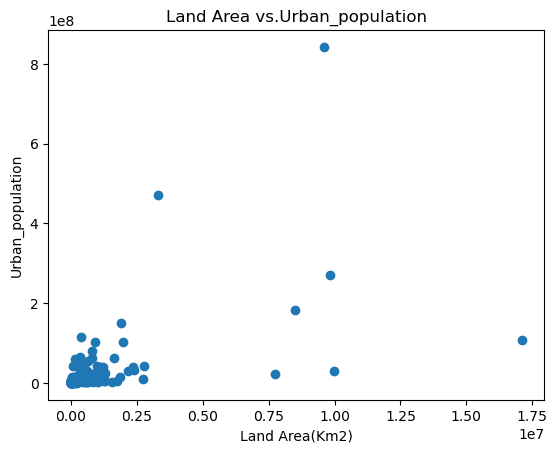

In [114]:
plt.scatter(data['Land Area(Km2)'], data['Urban_population'])
plt.xlabel('Land Area(Km2)')
plt.ylabel('Urban_population')
plt.title('Land Area vs.Urban_population')
plt.show()

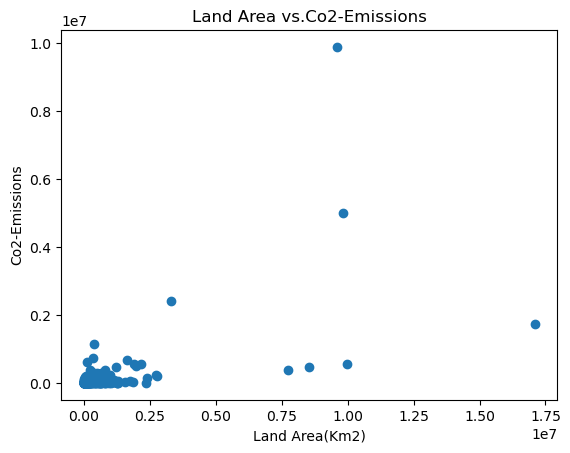

In [115]:
plt.scatter(data['Land Area(Km2)'], data['Co2-Emissions'])
plt.xlabel('Land Area(Km2)')
plt.ylabel('Co2-Emissions')
plt.title('Land Area vs.Co2-Emissions')
plt.show()

**Explore correlations between economic indicators such as GDP and various socio-economic factors.**

                                              GDP  Density\n(P/Km2)  \
GDP                                      1.000000         -0.017690   
Density\n(P/Km2)                        -0.017690          1.000000   
Agricultural Land( %)                    0.051840         -0.108478   
Unemployment rate                        0.031221         -0.103084   
Gross primary education enrollment (%)  -0.004062          0.009727   
Gross tertiary education enrollment (%)  0.211881          0.109555   
Infant mortality                        -0.152934         -0.106076   
Urban_population                         0.784276         -0.022420   

                                         Agricultural Land( %)  \
GDP                                                   0.051840   
Density\n(P/Km2)                                     -0.108478   
Agricultural Land( %)                                 1.000000   
Unemployment rate                                     0.062049   
Gross primary education enroll

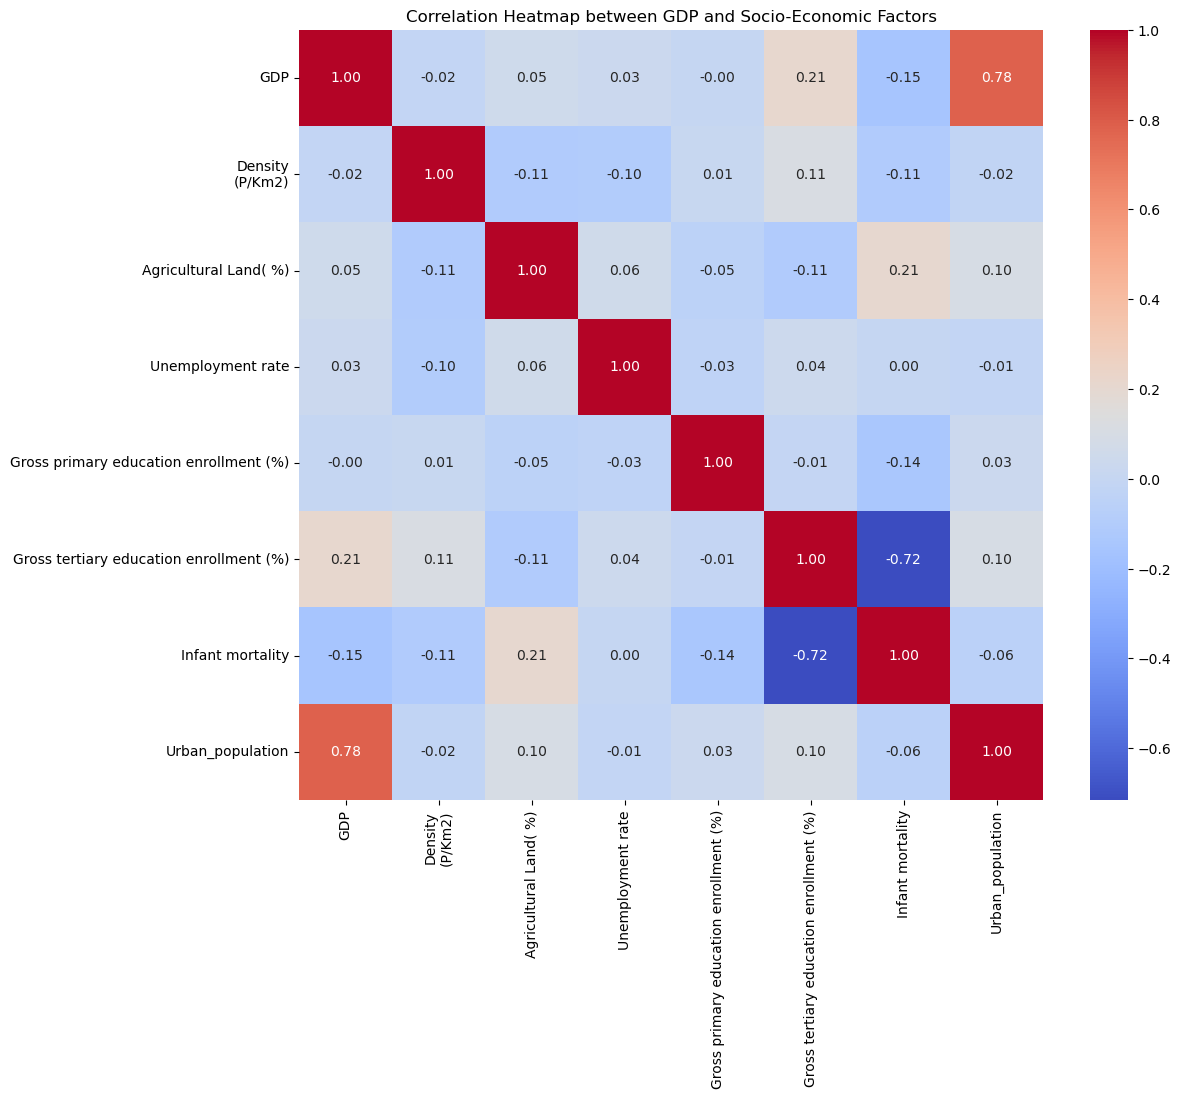

In [119]:


# Define the list of socio-economic factors to explore correlations with GDP
socio_economic_factors=data.copy()
socio_economic_factors = [
    "Density\n(P/Km2)",
    "Agricultural Land( %)",
    "Unemployment rate",
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
    "Infant mortality",
    "Urban_population",
    # Add other relevant socio-economic factors here
]

# Calculate correlations
correlation_df = data[["GDP"] + socio_economic_factors]
correlation_matrix = correlation_df.corr()

print(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between GDP and Socio-Economic Factors")
plt.show()


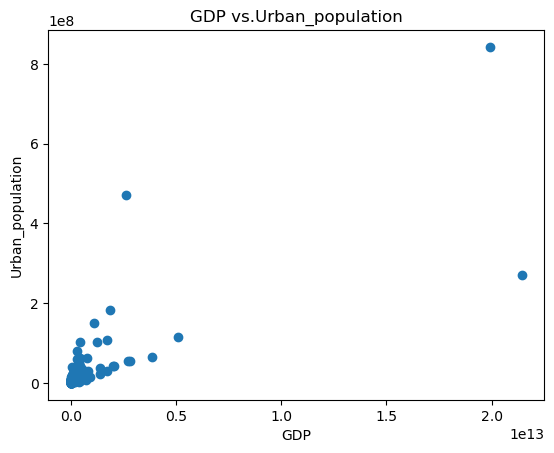

In [120]:
plt.scatter(data['GDP'], data['Urban_population'])
plt.xlabel('GDP')
plt.ylabel('Urban_population')
plt.title('GDP vs.Urban_population')
plt.show()


**Investigate educational enrollment rates and their implications for human capital development.**

In [122]:
education_enrollment_rates=data.copy()
education_enrollment_rates = [
    "Gross primary education enrollment (%)",
    "Gross tertiary education enrollment (%)",
]
human_capital_indicators=data.copy()
human_capital_indicators = [

    "Life expectancy",
    "GDP",
    # Add other relevant indicators of human capital development here
]

correlation_df = data[education_enrollment_rates + human_capital_indicators]
correlation_matrix = correlation_df.corr()

print(correlation_matrix)


                                         Gross primary education enrollment (%)  \
Gross primary education enrollment (%)                                 1.000000   
Gross tertiary education enrollment (%)                               -0.009141   
Life expectancy                                                        0.094907   
GDP                                                                   -0.004062   

                                         Gross tertiary education enrollment (%)  \
Gross primary education enrollment (%)                                 -0.009141   
Gross tertiary education enrollment (%)                                 1.000000   
Life expectancy                                                         0.722535   
GDP                                                                     0.211881   

                                         Life expectancy       GDP  
Gross primary education enrollment (%)          0.094907 -0.004062  
Gross tertiary education 

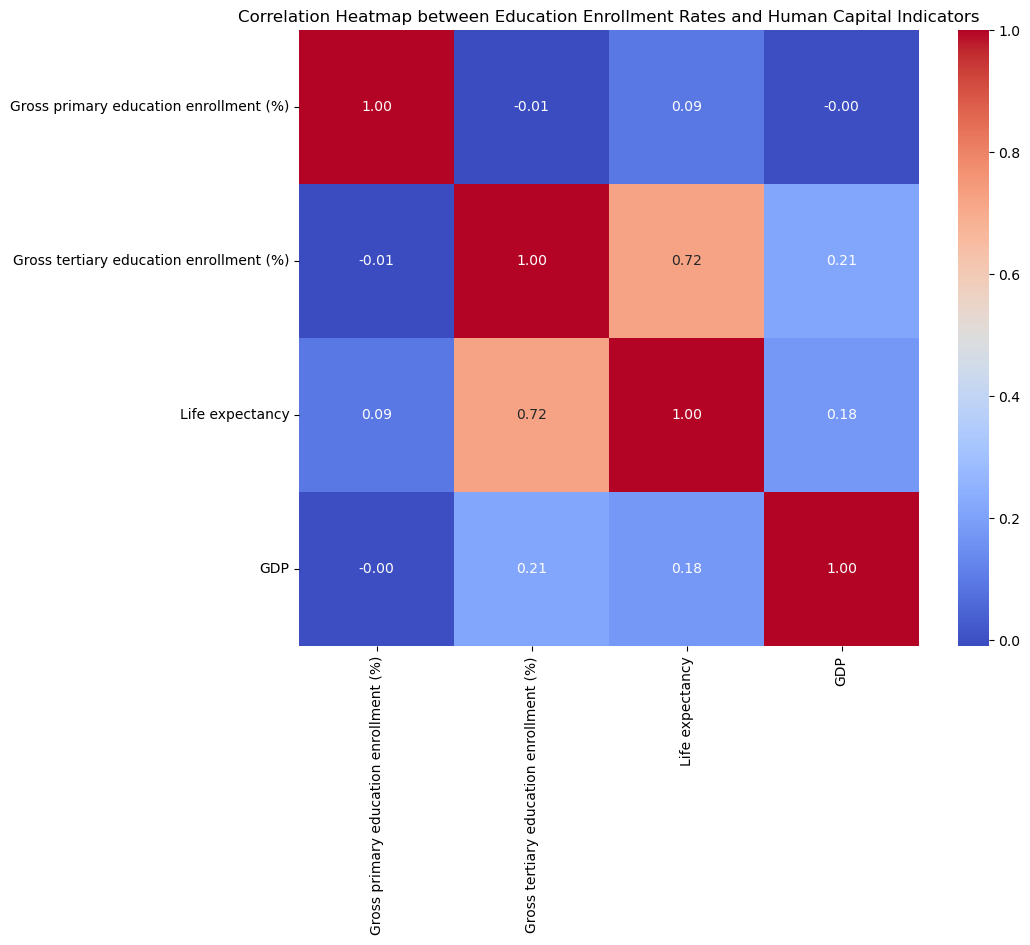

In [123]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Education Enrollment Rates and Human Capital Indicators")
plt.show()

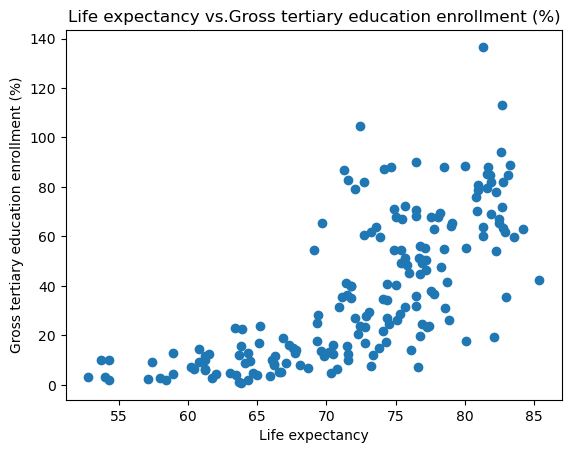

In [124]:
plt.scatter(data['Life expectancy'], data['Gross tertiary education enrollment (%)'])
plt.xlabel('Life expectancy')
plt.ylabel('Gross tertiary education enrollment (%)')
plt.title('Life expectancy vs.Gross tertiary education enrollment (%)')
plt.show()

**Analyze healthcare metrics such as infant mortality and life expectancy to assess overall well-being.**

In [125]:
infant_mortality_mean = data["Infant mortality"].mean()
life_expectancy_mean = data["Life expectancy"].mean()

print(f"Mean Infant Mortality: {infant_mortality_mean:.2f}")
print(f"Mean Life Expectancy: {life_expectancy_mean:.2f}")


Mean Infant Mortality: 21.33
Mean Life Expectancy: 72.28


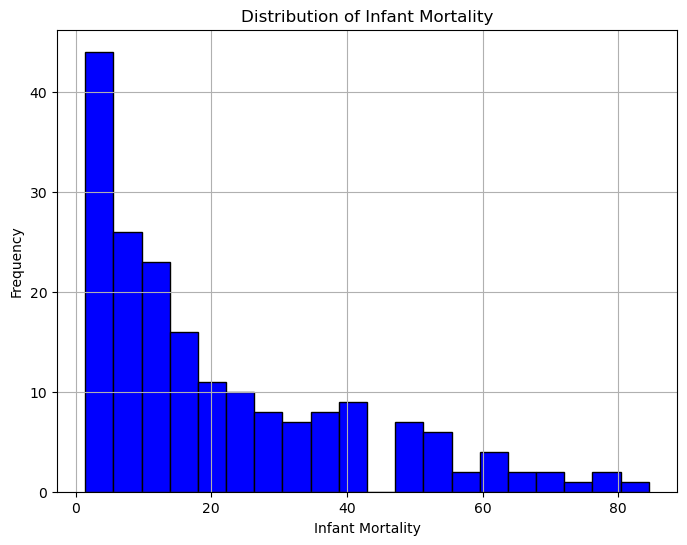

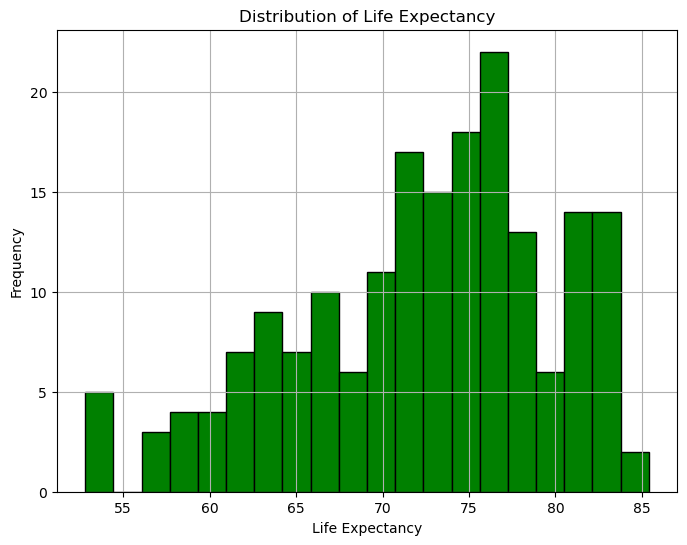

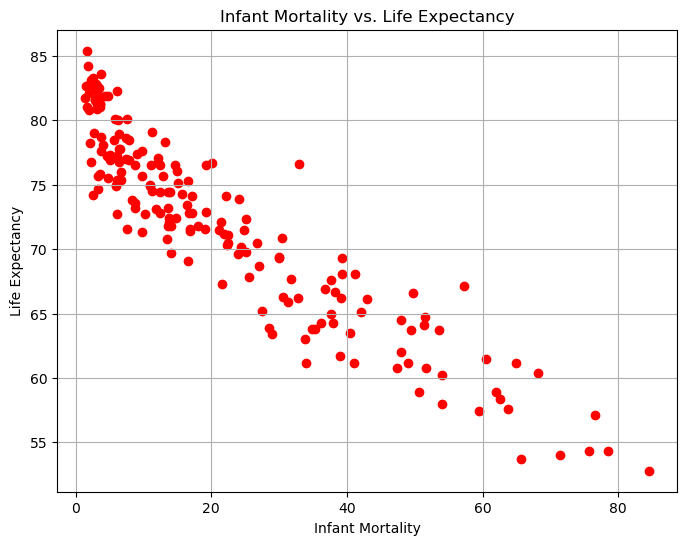

In [128]:
# Histogram for Infant Mortality
plt.figure(figsize=(8, 6))
plt.hist(data["Infant mortality"], bins=20, color="blue", edgecolor="black")
plt.xlabel("Infant Mortality")
plt.ylabel("Frequency")
plt.title("Distribution of Infant Mortality")
plt.grid(True)
plt.show()

# Histogram for Life Expectancy
plt.figure(figsize=(8, 6))
plt.hist(data["Life expectancy"], bins=20, color="green", edgecolor="black")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.grid(True)
plt.show()

# Scatter plot between Infant Mortality and Life Expectancy
plt.figure(figsize=(8, 6))
plt.scatter(data["Infant mortality"], data["Life expectancy"], color="red")
plt.xlabel("Infant Mortality")
plt.ylabel("Life Expectancy")
plt.title("Infant Mortality vs. Life Expectancy")
plt.grid(True)
plt.show()


**Study labor market dynamics through indicators such as labor force participation and unemployment rates.**

Mean Labor Force Participation: 62.74
Mean Unemployment Rate: 6.89


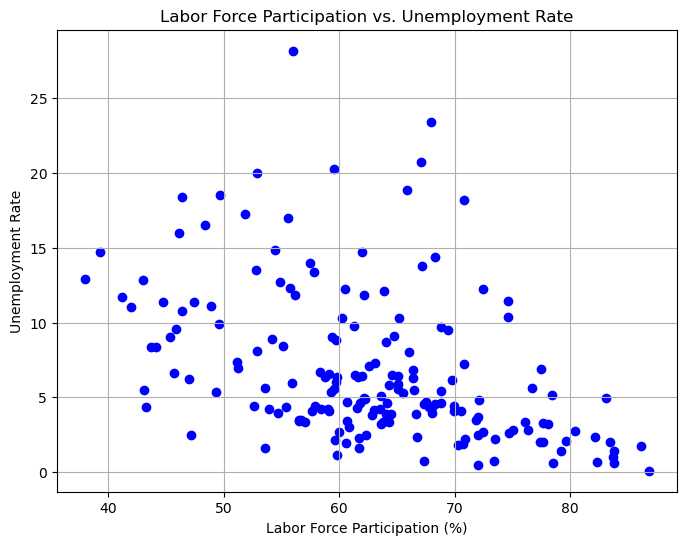

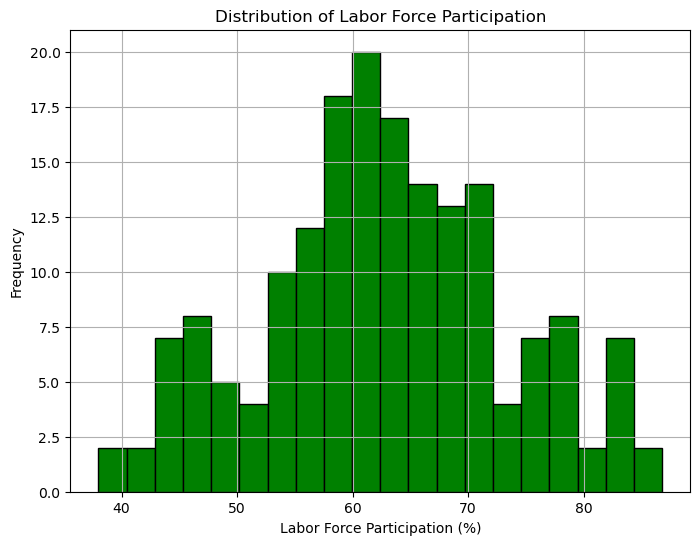

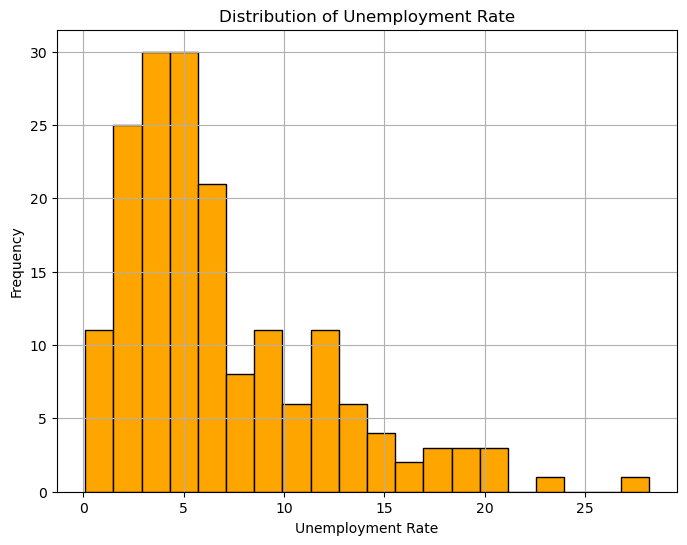

In [132]:
# Calculate summary statistics for labor force participation and unemployment rate
labor_force_participation_mean = data["Population: Labor force participation (%)"].mean()
unemployment_rate_mean = data["Unemployment rate"].mean()

print(f"Mean Labor Force Participation: {labor_force_participation_mean:.2f}")
print(f"Mean Unemployment Rate: {unemployment_rate_mean:.2f}")

# Create scatter plot between labor force participation and unemployment rate
plt.figure(figsize=(8, 6))
plt.scatter(data["Population: Labor force participation (%)"], data["Unemployment rate"], color="blue")
plt.xlabel("Labor Force Participation (%)")
plt.ylabel("Unemployment Rate")
plt.title("Labor Force Participation vs. Unemployment Rate")
plt.grid(True)
plt.show()

# Create a histogram for labor force participation
plt.figure(figsize=(8, 6))
plt.hist(data["Population: Labor force participation (%)"], bins=20, color="green", edgecolor="black")
plt.xlabel("Labor Force Participation (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Labor Force Participation")
plt.grid(True)
plt.show()

# Create a histogram for unemployment rate
plt.figure(figsize=(8, 6))
plt.hist(data["Unemployment rate"], bins=20, color="orange", edgecolor="black")
plt.xlabel("Unemployment Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Unemployment Rate")
plt.grid(True)

**Investigate the role of taxation and its impact on economic development.**

                                        Tax revenue (%)  Total tax rate  \
Tax revenue (%)                                1.000000       -0.117003   
Total tax rate                                -0.117003        1.000000   
GDP                                           -0.118468        0.051237   
Unemployment rate                              0.225804       -0.034378   
Population                                    -0.190038        0.082072   
Gross primary education enrollment (%)         0.169776       -0.070307   

                                             GDP  Unemployment rate  \
Tax revenue (%)                        -0.118468           0.225804   
Total tax rate                          0.051237          -0.034378   
GDP                                     1.000000           0.031221   
Unemployment rate                       0.031221           1.000000   
Population                              0.632326          -0.042290   
Gross primary education enrollment (%) -0.004062

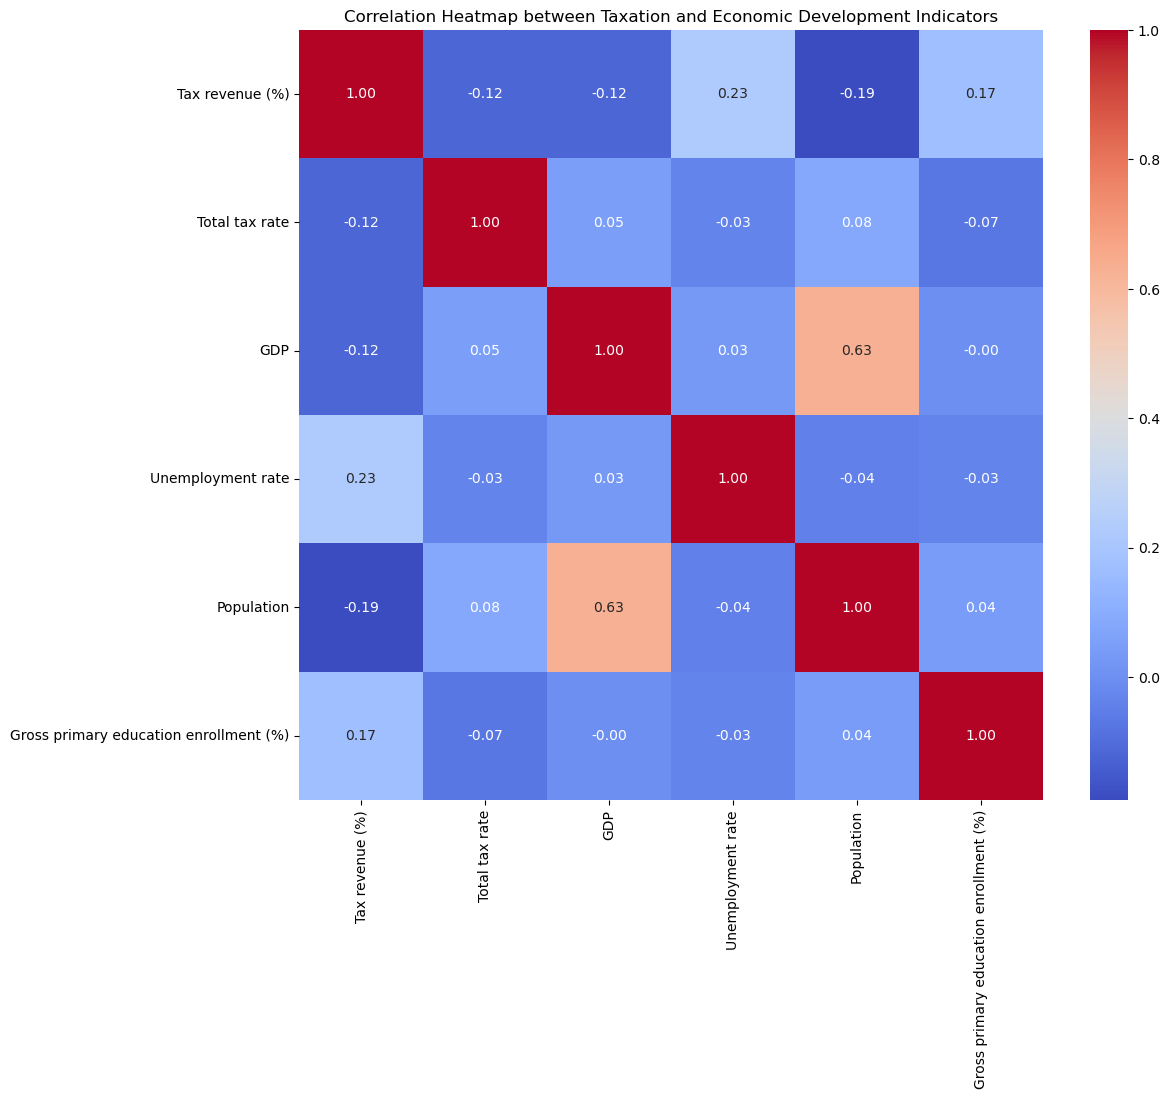

In [133]:
# Define the list of tax-related variables and indicators of economic development
tax_related_variables=data.copy()
economic_development_indicators=data.copy()
tax_related_variables = ["Tax revenue (%)", "Total tax rate"]
economic_development_indicators = [
    "GDP",
    "Unemployment rate",
    "Population",
    "Gross primary education enrollment (%)",
    # Add other relevant indicators of economic development here
]

# Calculate correlations
correlation_df = data[tax_related_variables + economic_development_indicators]
correlation_matrix = correlation_df.corr()

print(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap between Taxation and Economic Development Indicators")
plt.show()


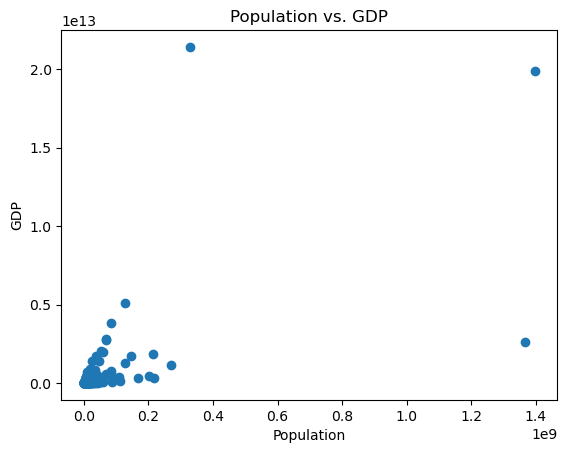

In [134]:
plt.scatter(data['Population'], data['GDP'])
plt.xlabel('Population')
plt.ylabel('GDP')
plt.title('Population vs. GDP')
plt.show()

**Explore urbanization trends and their social and environmental consequences.**

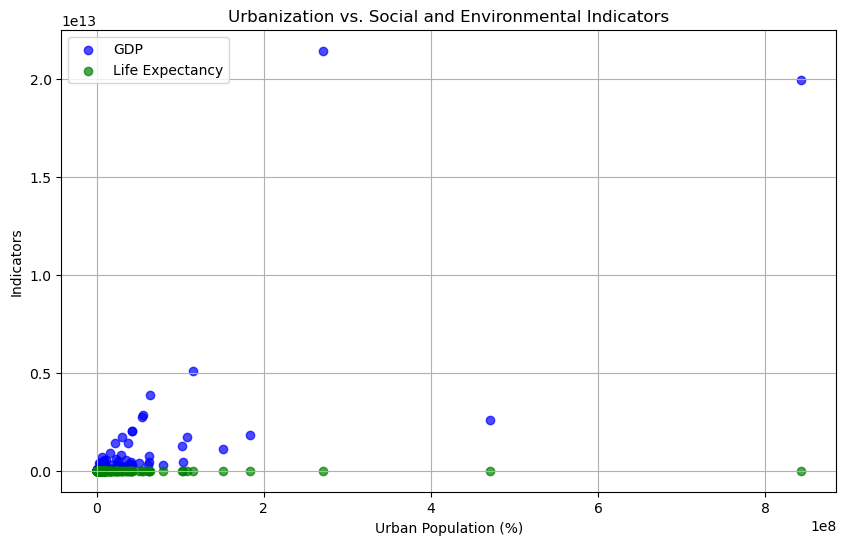

In [136]:
# Scatter plot between Urban Population and other relevant indicators (e.g., GDP, Life Expectancy, etc.)
plt.figure(figsize=(10, 6))
plt.scatter(data["Urban_population"], data["GDP"], label="GDP", color="blue", alpha=0.7)
plt.scatter(data["Urban_population"], data["Life expectancy"], label="Life Expectancy", color="green", alpha=0.7)
# Add more relevant indicators as needed
plt.xlabel("Urban Population (%)")
plt.ylabel("Indicators")
plt.title("Urbanization vs. Social and Environmental Indicators")
plt.legend()
plt.grid(True)
plt.show()


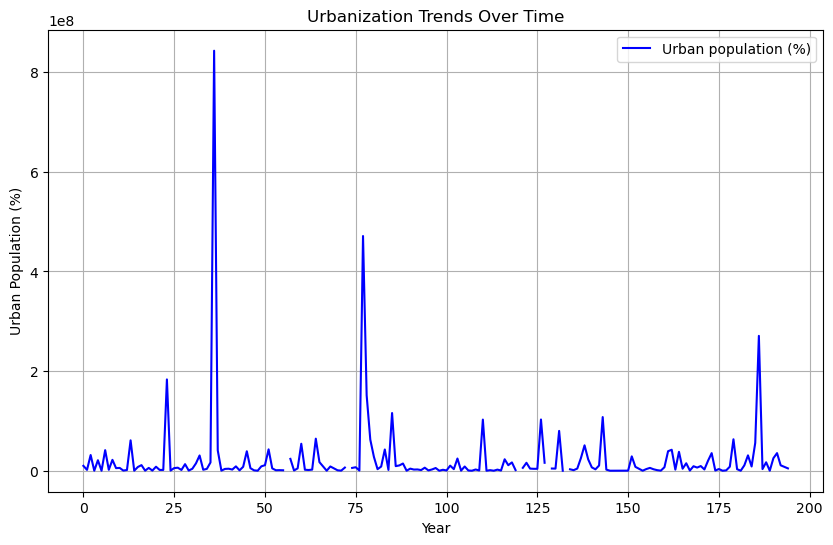

In [137]:
# Line plot for urbanization trends
plt.figure(figsize=(10, 6))
plt.plot(data["Urban_population"], label="Urban population (%)", color="blue")
plt.xlabel("Year")
plt.ylabel("Urban Population (%)")
plt.title("Urbanization Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()


All the possible use cases has been solved, If there is any improvement need please comment below.

**If you want to see for top 10 countries. **

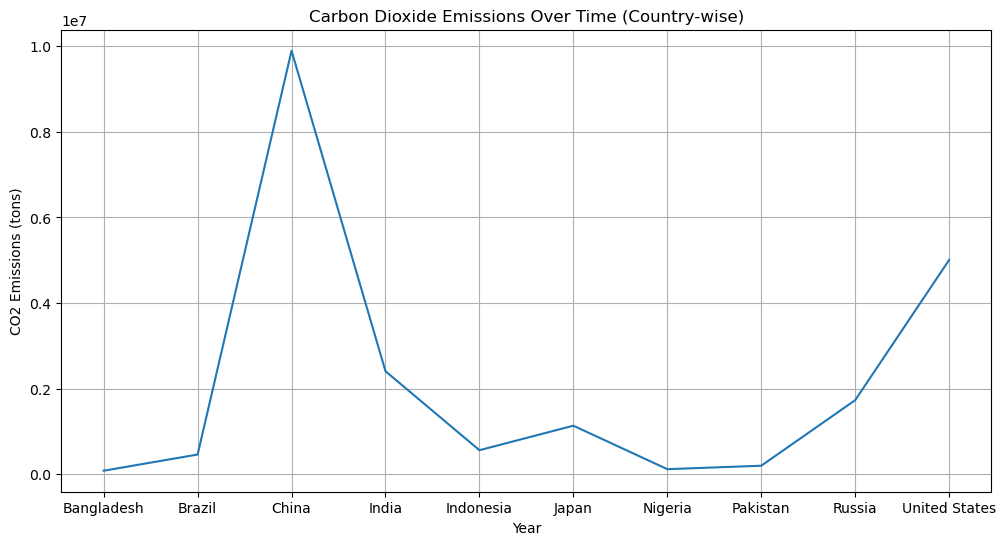

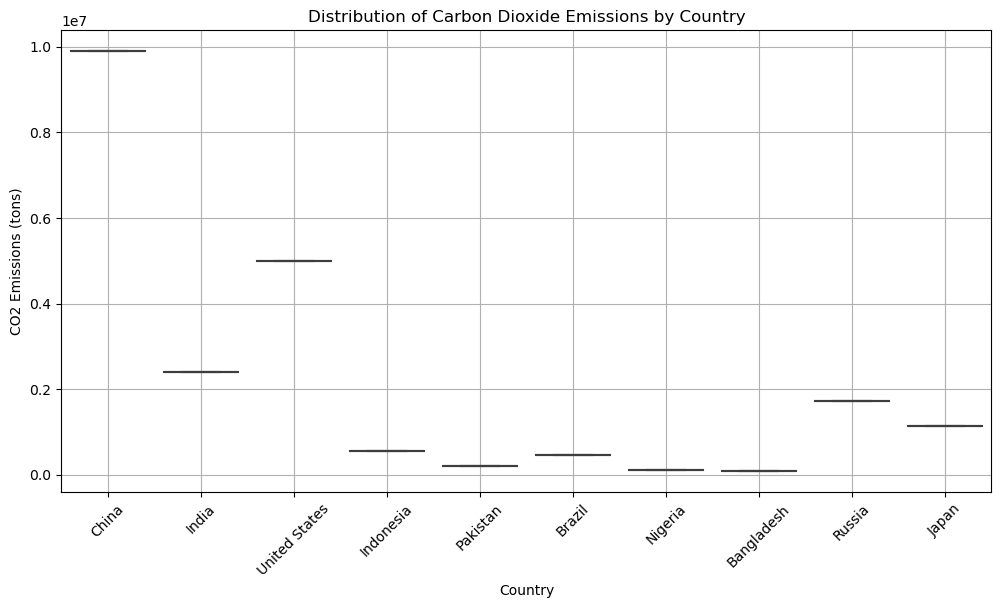

In [144]:
# Line plot to visualize carbon dioxide emissions over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=top_countries["Country"][:10], y='Co2-Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tons)')
plt.title('Carbon Dioxide Emissions Over Time (Country-wise)')
plt.grid(True)
plt.show()

# Box plot to compare carbon dioxide emissions distribution among different countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=data,x=top_countries["Country"][:10], y='Co2-Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (tons)')
plt.title('Distribution of Carbon Dioxide Emissions by Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

